In [1]:
from ntm_train import *
from LSTMCopy import *

In [2]:
init_seed(10)
NUM_BITS = 8
LSTM_DIM = 256
MIN_LENGTH = 1
MAX_LENGTH = 20
LEARNING_RATE = 1e-4
MOMENTUM = 0.9 
MINI_BATCH = 20
EPOCH = 50000

# model = LSTMCopy(NUM_BITS+1,LSTM_DIM,NUM_BITS,1,MINI_BATCH)

#model = EncapsulatedNTM(num_inputs=NUM_BITS+1, num_outputs=NUM_BITS,
#                        controller_size=100, controller_layers=1, num_heads=1, N=128, M=20, controller_type ='mlp')

model = EncapsulatedNTM(num_inputs=NUM_BITS+1, num_outputs=NUM_BITS,
                        controller_size=100, controller_layers=1, num_heads=1, N=128, M=20, controller_type ='lstm')

loss_function = nn.BCELoss()
optimizer = optim.RMSprop(model.parameters(), lr=LEARNING_RATE, momentum = MOMENTUM)

train_data_loader = dataloader(EPOCH,MINI_BATCH,NUM_BITS,MIN_LENGTH,MAX_LENGTH)

In [ ]:
list_seq_num, list_loss, list_cost = train(model, train_data_loader, loss_function, optimizer, interval=1)
saveCheckpoint(model,list_seq_num,list_loss, list_cost, path='lstm_l1_b20_e50000_i1') 

# Load three models and experiment results

In [3]:
model_lstm, list_seq_num, list_loss, list_cost = loadCheckpoint(path='lstm_l1_b20_e50000_i1')
cost_lstm_50 = np.mean(np.array(list_cost).reshape(50,1000), axis=1)

model_ntm_mlp, list_seq_num, list_loss, list_cost = loadCheckpoint(path='ntm_mlp_l1_b20_e50000_i1')
cost_ntm_mlp_50 = np.mean(np.array(list_cost).reshape(50,1000), axis=1)

model_ntm_lstm, list_seq_num, list_loss, list_cost = loadCheckpoint(path='ntm_lstm_l1_b20_e50000_i1')
cost_ntm_lstm_50 = np.mean(np.array(list_cost).reshape(50,1000), axis=1)


==> Resuming from checkpoint..
==> Resuming from checkpoint..
==> Resuming from checkpoint..


## Number of parameters

In [52]:
print ('number of parameters of LSTM : %f' % (model_lstm.calculate_num_params()))
print ('number of parameters of Feedforward-NTM : %f' % (model_ntm_mlp.calculate_num_params()))
print ('number of parameters of LSTM-NTM : %f' % (model_ntm_lstm.calculate_num_params()))            

number of parameters of LSTM : 45208.000000
number of parameters of Feedforward-NTM : 13260.000000
number of parameters of LSTM-NTM : 62860.000000


## Learning curves of three models

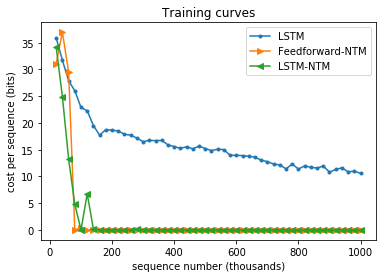

In [45]:
# plot learning curves
plt.plot(range(20,1020,20),cost_lstm_50,linestyle='-', marker ='.',label='LSTM')
plt.plot(range(20,1020,20),cost_ntm_mlp_50,linestyle='-', marker='>',label='Feedforward-NTM')
plt.plot(range(20,1020,20),cost_ntm_lstm_50,linestyle='-', marker='<',label='LSTM-NTM')
plt.xlabel('sequence number (thousands)')
plt.ylabel('cost per sequence (bits)')
plt.title('Training curves')
plt.legend()

## Generalisation to longer sequences

In [34]:
# LSTM
list_avg_loss_lstm = []
list_avg_cost_lstm = []
for T in range(10,110,10) : 
    test_data_loader = dataloader(num_batches = 1,batch_size = MINI_BATCH,seq_width=8,min_len=T,max_len=T)
    avg_loss, avg_cost = evaluate(model_lstm,test_data_loader,loss_function)
    list_avg_loss_lstm.append(avg_loss)
    list_avg_cost_lstm.append(avg_cost)

T = 10, Average loss 0.001601, average cost 1.400000
T = 20, Average loss 0.017907, average cost 39.950000
T = 30, Average loss 0.026950, average cost 81.700000
T = 40, Average loss 0.040707, average cost 123.250000
T = 50, Average loss 0.051658, average cost 164.950000
T = 60, Average loss 0.059191, average cost 209.850000
T = 70, Average loss 0.068051, average cost 249.800000
T = 80, Average loss 0.075174, average cost 291.600000
T = 90, Average loss 0.079246, average cost 338.150000
T = 100, Average loss 0.078392, average cost 370.500000


In [39]:
# Feedforward-NTM
list_avg_loss_ntm_mlp = []
list_avg_cost_ntm_mlp = []
for T in range(10,110,10) : 
    test_data_loader = dataloader(num_batches = 1,batch_size = MINI_BATCH,seq_width=8,min_len=T,max_len=T)
    avg_loss, avg_cost = evaluate(model_ntm_mlp,test_data_loader,loss_function)
    list_avg_loss_ntm_mlp.append(avg_loss)
    list_avg_cost_ntm_mlp.append(avg_cost)

T = 10, Average loss 0.000000, average cost 0.000000
T = 20, Average loss 0.000000, average cost 0.000000
T = 30, Average loss 0.000000, average cost 0.000000
T = 40, Average loss 0.000000, average cost 0.000000
T = 50, Average loss 0.000123, average cost 0.150000
T = 60, Average loss 0.017580, average cost 17.400000
T = 70, Average loss 0.081317, average cost 55.650000
T = 80, Average loss 0.127783, average cost 92.500000
T = 90, Average loss 0.183474, average cost 132.300000
T = 100, Average loss 0.233216, average cost 173.450000


In [38]:
# LSTM-NTM
list_avg_loss_ntm_lstm = []
list_avg_cost_ntm_lstm = []
for T in range(10,110,10) : 
    test_data_loader = dataloader(num_batches = 1,batch_size = MINI_BATCH,seq_width=8,min_len=T,max_len=T)
    avg_loss, avg_cost = evaluate(model_ntm_lstm,test_data_loader,loss_function)
    list_avg_loss_ntm_lstm.append(avg_loss)
    list_avg_cost_ntm_lstm.append(avg_cost)

T = 10, Average loss 0.000000, average cost 0.000000
T = 20, Average loss 0.000000, average cost 0.000000
T = 30, Average loss 0.000000, average cost 0.000000
T = 40, Average loss 0.000000, average cost 0.000000
T = 50, Average loss 0.000000, average cost 0.000000
T = 60, Average loss 0.000025, average cost 0.100000
T = 70, Average loss 0.000061, average cost 0.250000
T = 80, Average loss 0.000048, average cost 0.300000
T = 90, Average loss 0.045188, average cost 36.100000
T = 100, Average loss 0.059640, average cost 59.500000


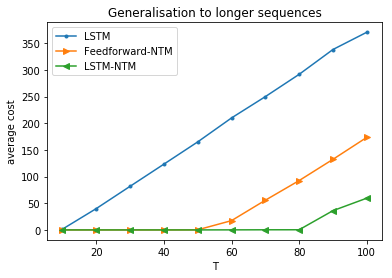

In [46]:
plt.plot(range(10,110,10),list_avg_cost_lstm,linestyle='-', marker='.',label='LSTM')
plt.plot(range(10,110,10),list_avg_cost_ntm_mlp,linestyle='-', marker='>',label='Feedforward-NTM')
plt.plot(range(10,110,10),list_avg_cost_ntm_lstm,linestyle='-', marker='<', label='LSTM-NTM')
plt.xlabel('T')
plt.ylabel('average cost')
plt.title('Generalisation to longer sequences')
plt.legend()

## Visualising the read and write heads/attention

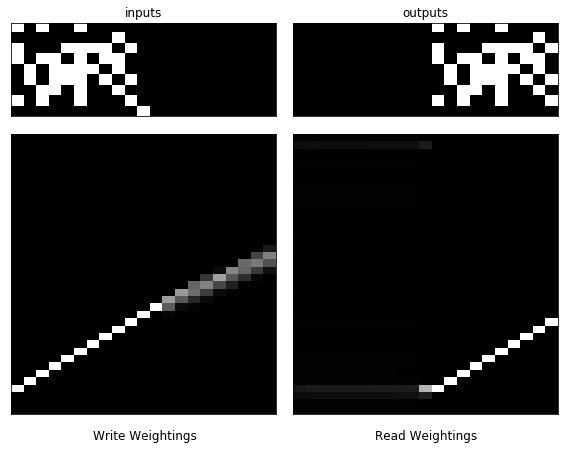

In [4]:
T = 10
test_data_loader = dataloader(num_batches = 1,batch_size = MINI_BATCH,seq_width=8,min_len=T,max_len=T)

for batch_num, X, Y in test_data_loader :
    result = evaluate_single_batch(model_ntm_lstm,loss_function, X, Y)
    visualize_read_write(X,result,model_ntm_lstm.N)